In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [ ]:
df=pd.read_csv('bikes.csv')
df.info()
print(df.shape)
print(df.head())
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         731 non-null    object 
 1   season       731 non-null    int64  
 2   holiday      731 non-null    int64  
 3   weekday      731 non-null    int64  
 4   weather      731 non-null    int64  
 5   temperature  731 non-null    float64
 6   realfeel     731 non-null    float64
 7   humidity     731 non-null    float64
 8   windspeed    731 non-null    float64
 9   rentals      731 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 57.2+ KB
(731, 10)
         date  season  holiday  weekday  weather  temperature   realfeel  \
0  2011-01-01       1        0        6        2    46.716528  46.398650   
1  2011-01-02       1        0        0        2    48.350239  45.224193   
2  2011-01-03       1        0        1        1    34.212394  25.701314   
3  2011-01-04 

,date,season,holiday,weekday,weather,temperature,realfeel,humidity,windspeed,rentals
726,2012-12-27,1,0,4,2,39.102528,30.125070,0.652917,14.576687,2114
727,2012-12-28,1,0,5,2,39.031972,33.499465,0.590000,6.472546,3095
728,2012-12-29,1,0,6,2,39.031972,31.997120,0.752917,5.178295,1341
729,2012-12-30,1,0,0,1,39.243472,30.725960,0.483333,14.602540,1796
730,2012-12-31,1,0,1,2,35.859472,29.750256,0.577500,6.446527,2729


In [ ]:
pd.isnull(df).any()

date           False
season         False
holiday        False
weekday        False
weather        False
temperature    False
realfeel       False
humidity       False
windspeed      False
rentals        False
dtype: bool

Text(0, 0.5, 'temperature')

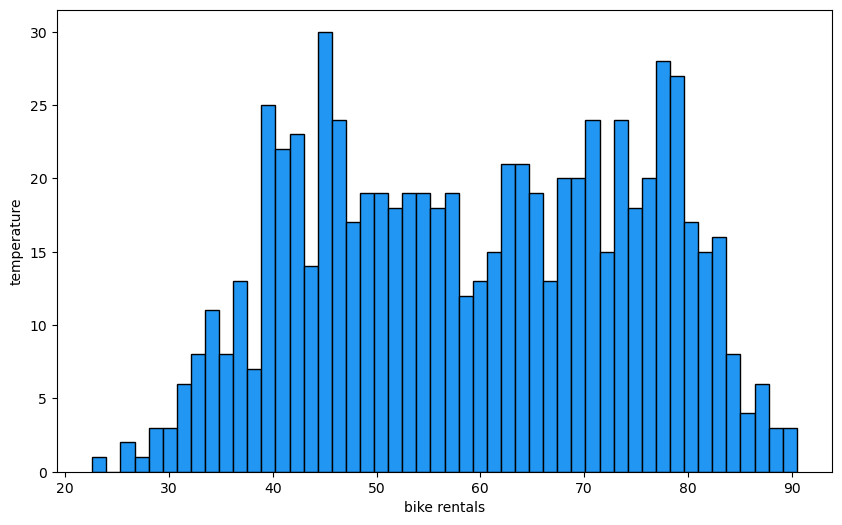

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['temperature'], bins=50, ec='black', color='#2196f3')
plt.xlabel('bike rentals')
plt.ylabel('temperature')

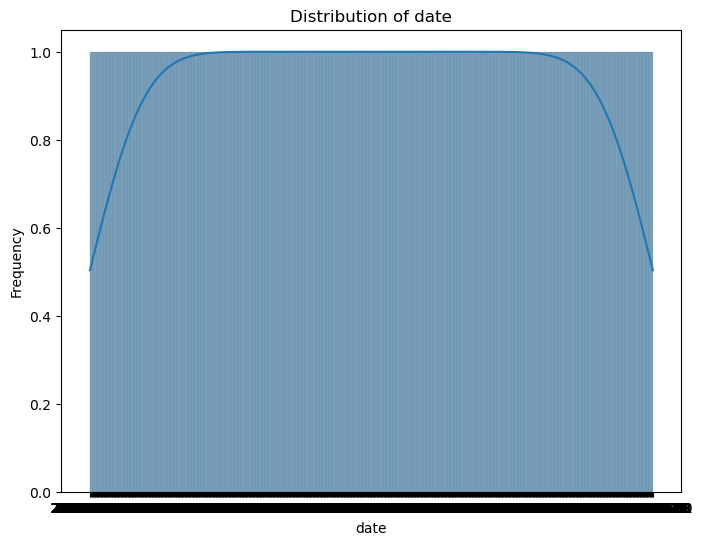

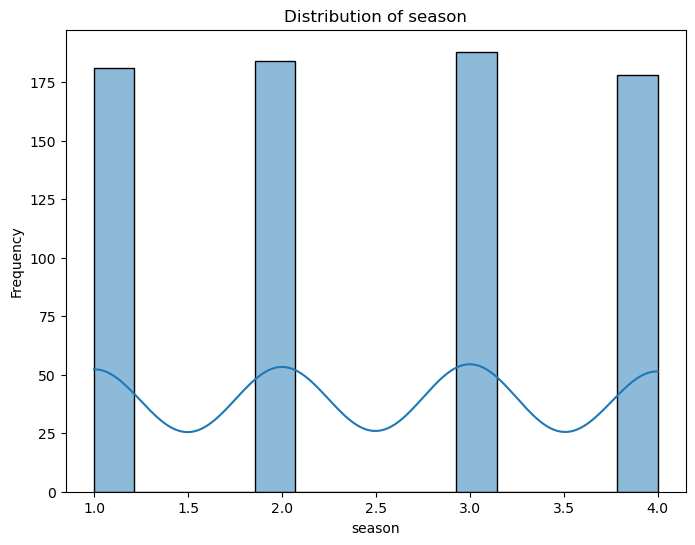

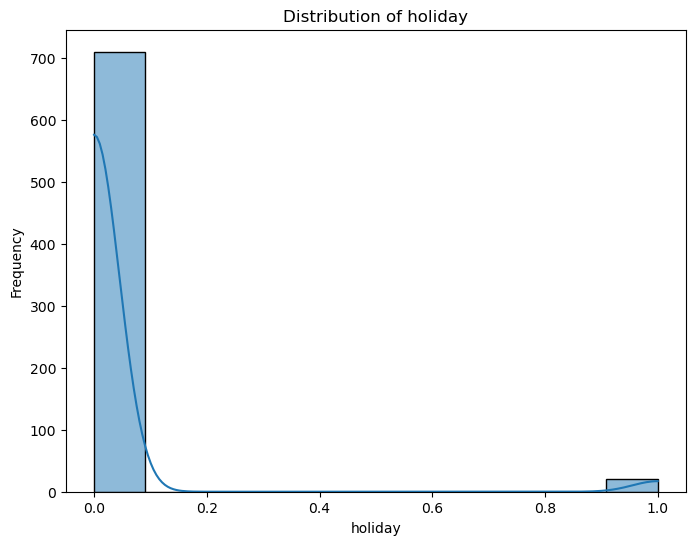

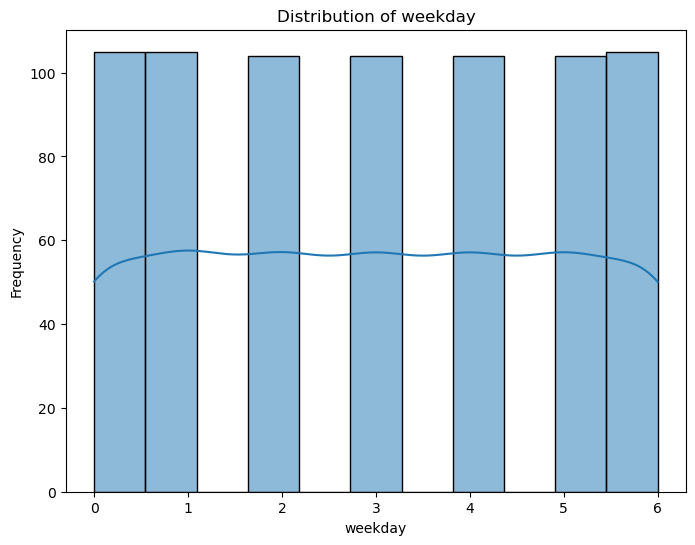

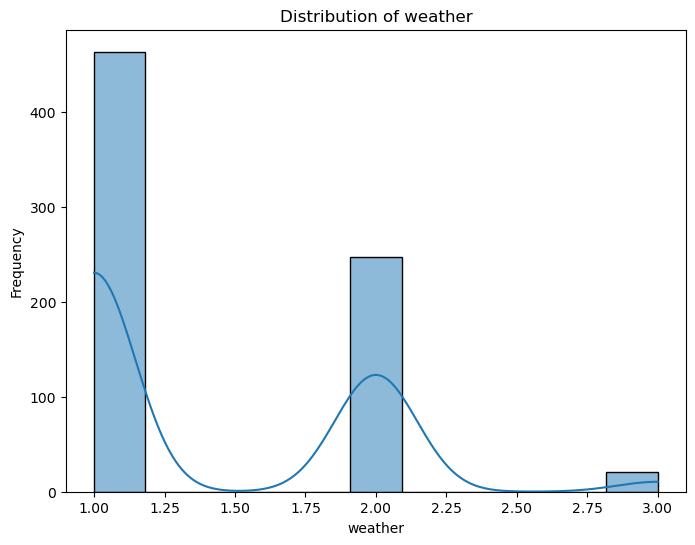

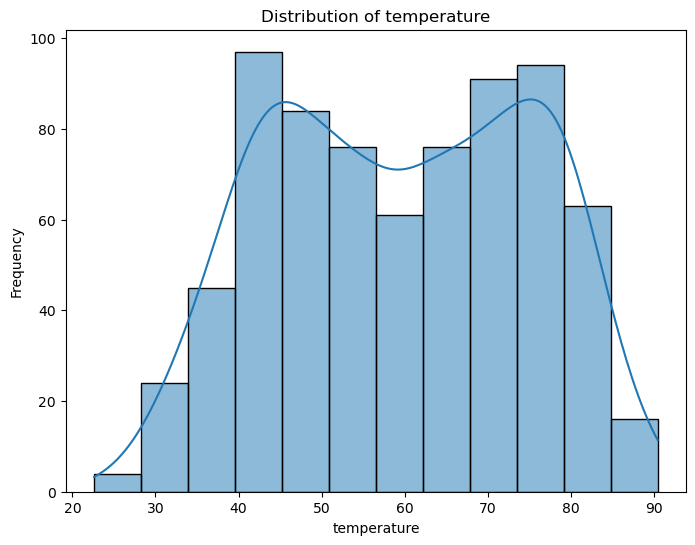

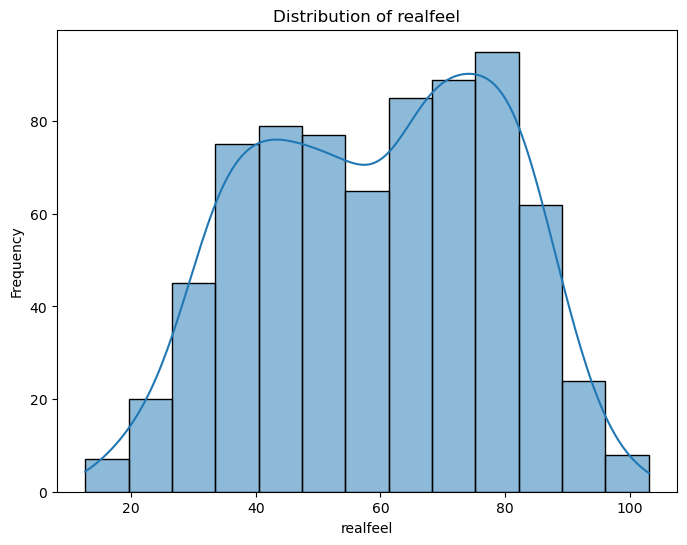

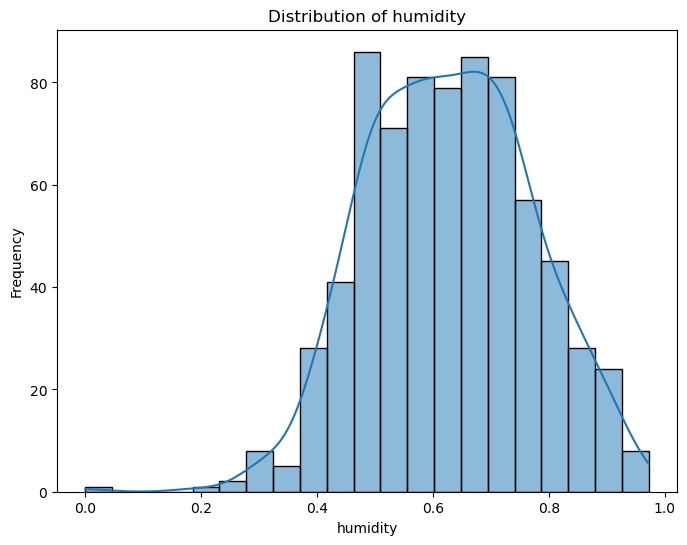

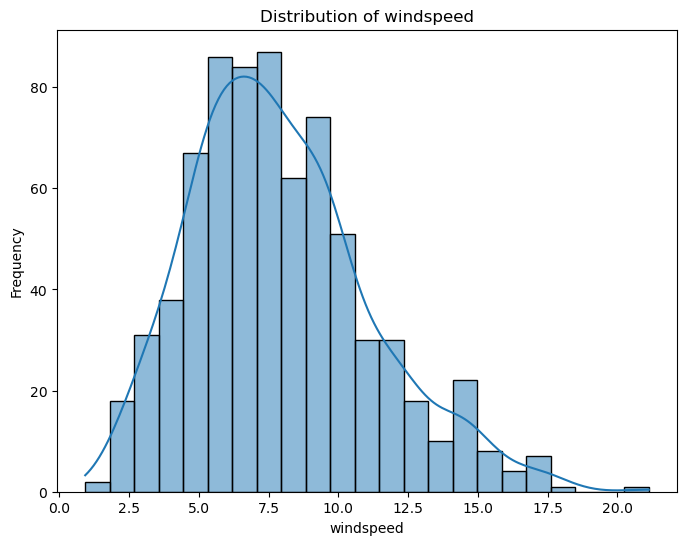

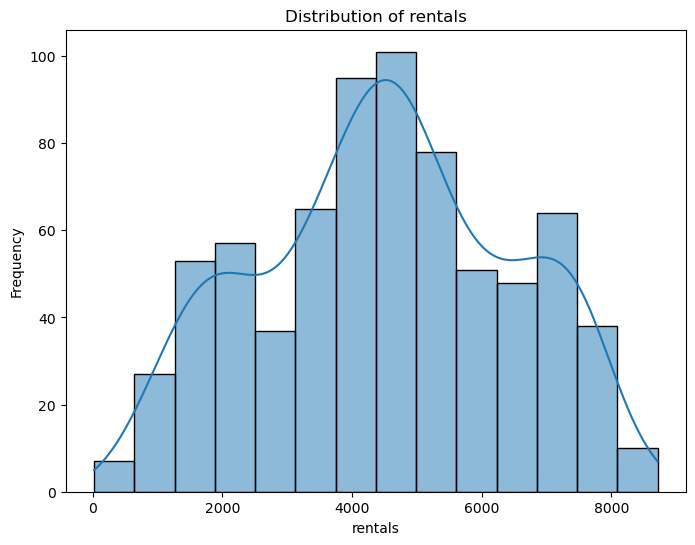

In [ ]:
for column in df.columns:
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:

# Function to identify outliers using the quantile method
def identify_outliers(df, column):
    # Calculate the first quartile (Q1)
    Q1 = df[column].quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower bound and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers

# Function to drop outliers from the dataset
def drop_outliers(df, outliers):
    # Drop rows containing outliers
    df_cleaned = df.drop(outliers.index)

    return df_cleaned

# Identify outliers for each numerical variable in the dataset
outliers_dict = {}
for column in df.select_dtypes(include=['number']).columns:
    outliers_dict[column] = identify_outliers(df, column)

# Drop outliers for each variable
for column, outliers in outliers_dict.items():
    df = drop_outliers(df, outliers)

# Print the cleaned dataset
print("Cleaned Dataset after dropping outliers:")
df

Cleaned Dataset after dropping outliers:


,date,season,holiday,weekday,weather,temperature,realfeel,humidity,windspeed,rentals
0,2011-01-01,1,0,6,2,46.716528,46.398650,0.805833,6.679665,985
1,2011-01-02,1,0,0,2,48.350239,45.224193,0.696087,10.347140,801
2,2011-01-03,1,0,1,1,34.212394,25.701314,0.437273,10.337565,1349
3,2011-01-04,1,0,2,1,34.520000,28.400094,0.590435,6.673420,1562
4,2011-01-05,1,0,3,1,36.800562,30.437276,0.436957,7.780994,1600
...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,0,4,2,39.102528,30.125070,0.652917,14.576687,2114
727,2012-12-28,1,0,5,2,39.031972,33.499465,0.590000,6.472546,3095
728,2012-12-29,1,0,6,2,39.031972,31.997120,0.752917,5.178295,1341
729,2012-12-30,1,0,0,1,39.243472,30.725960,0.483333,14.602540,1796


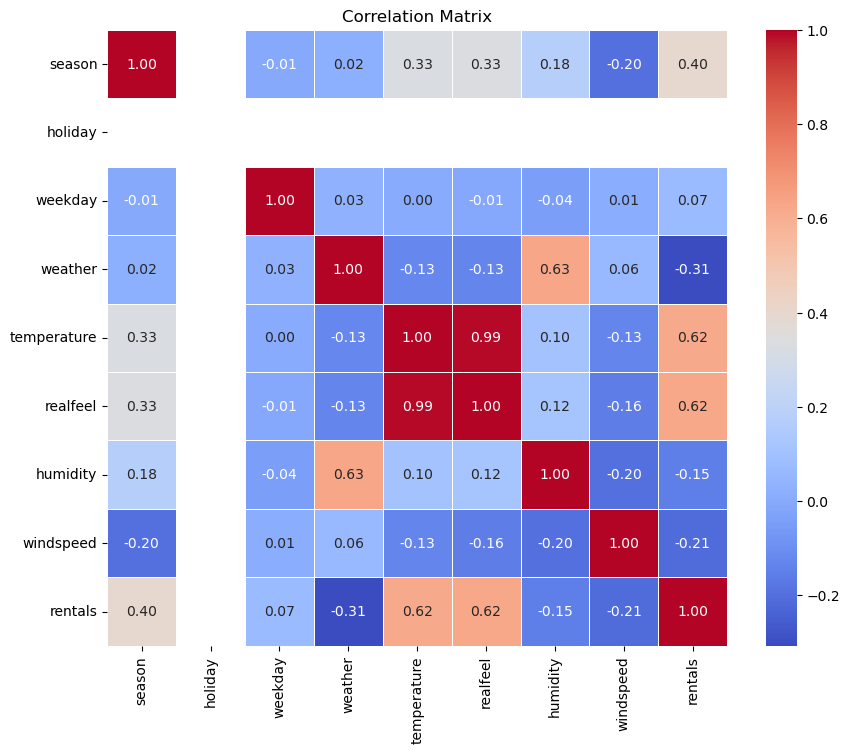

Relevant Features:
['rentals', 'realfeel', 'temperature']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated features with the target variable 'rentals'
target_correlation = corr_matrix['rentals'].abs().sort_values(ascending=False)
relevant_features = target_correlation[target_correlation > 0.5].index.tolist()

print("Relevant Features:")
print(relevant_features)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
df=df.drop('date',axis=1)

# Assuming 'rentals' is the target variable
X = df.drop('rentals', axis=1)  # Features
y = df['rentals']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (556, 8) (556,)
Testing set shape: (140, 8) (140,)


Mean Squared Error (MSE): 1799071.4661928427
Root Mean Squared Error (RMSE): 1341.2946977427603
R-squared (R^2) Score: 0.432862997682413


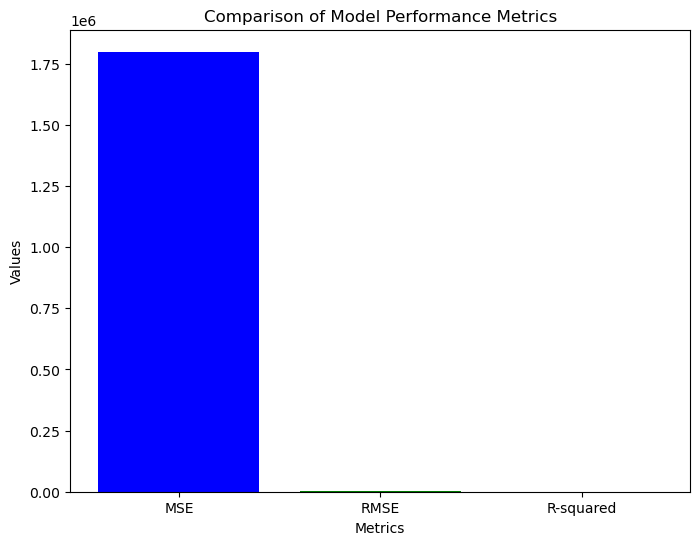

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import math

# Assuming 'rentals' is the target variable and 'feature1', 'feature2', etc. are your significant predictor variables
selected_features = ['realfeel','temperature']  # Replace with your significant predictor variables

X = df[selected_features]  # Features
y = df['rentals']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r_squared)

# Create a bar plot to compare model performance
metrics = ['MSE', 'RMSE', 'R-squared']
values = [mse, rmse, r_squared]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Model Performance Metrics')
plt.show()



Mean Squared Error: 1799071.4661928427
R-squared Score: 0.432862997682413


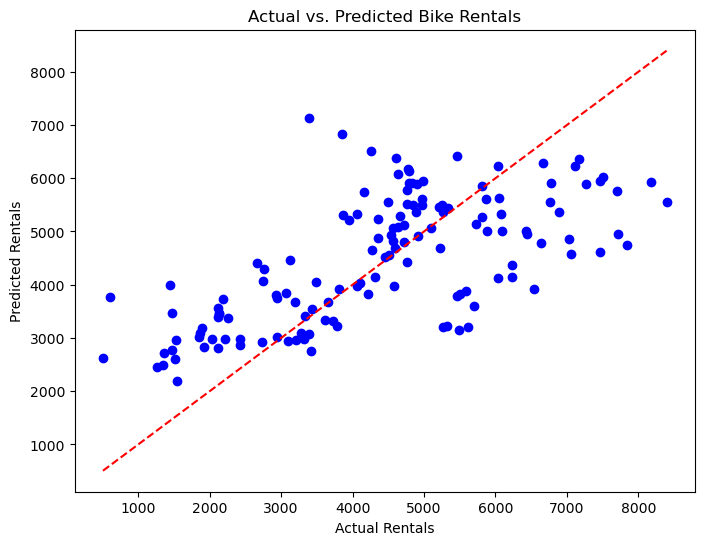

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
import matplotlib.pyplot as plt

# Plot actual vs. predicted rentals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Bike Rentals')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.show()

Linear Regression Metrics:
Mean Squared Error (MSE): 1799071.4661928427
Root Mean Squared Error (RMSE): 1341.2946977427603
R-squared (R^2) Score: 0.432862997682413

Decision Tree Regression Metrics:
Mean Squared Error (MSE): 3507209.0821428574
Root Mean Squared Error (RMSE): 1872.7544105255386
R-squared (R^2) Score: -0.10560813326484442

Random Forest Regression Metrics:
Mean Squared Error (MSE): 2153061.049214618
Root Mean Squared Error (RMSE): 1467.3312677151735
R-squared (R^2) Score: 0.3212717714642198



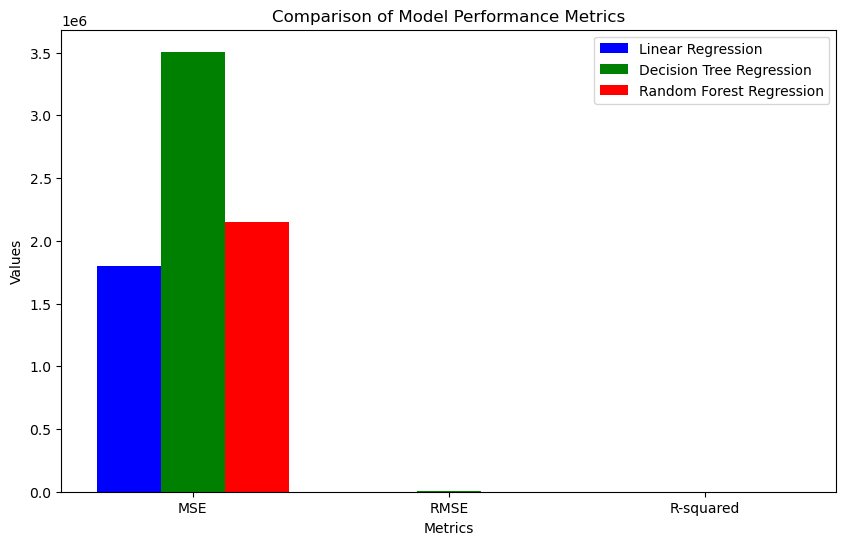

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


# Assuming 'rentals' is the target variable and 'feature1', 'feature2', etc. are your predictor variables
selected_features = ['realfeel','temperature']  # Replace with your predictor variables

X = df[selected_features]  # Features
y = df['rentals']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression models
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
linear_pred = linear_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for each model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = sqrt(linear_mse)
linear_r_squared = r2_score(y_test, linear_pred)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = sqrt(dt_mse)
dt_r_squared = r2_score(y_test, dt_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = sqrt(rf_mse)
rf_r_squared = r2_score(y_test, rf_pred)

# Print the evaluation metrics
print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", linear_mse)
print("Root Mean Squared Error (RMSE):", linear_rmse)
print("R-squared (R^2) Score:", linear_r_squared)
print()

print("Decision Tree Regression Metrics:")
print("Mean Squared Error (MSE):", dt_mse)
print("Root Mean Squared Error (RMSE):", dt_rmse)
print("R-squared (R^2) Score:", dt_r_squared)
print()

print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared (R^2) Score:", rf_r_squared)
print()

# Create bar plots to compare model performance
metrics = ['MSE', 'RMSE', 'R-squared']
linear_values = [linear_mse, linear_rmse, linear_r_squared]
dt_values = [dt_mse, dt_rmse, dt_r_squared]
rf_values = [rf_mse, rf_rmse, rf_r_squared]

bar_width = 0.25
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(index, linear_values, width=bar_width, label='Linear Regression', color='b')
plt.bar(index + bar_width, dt_values, width=bar_width, label='Decision Tree Regression', color='g')
plt.bar(index + 2*bar_width, rf_values, width=bar_width, label='Random Forest Regression', color='r')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Model Performance Metrics')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.show()

#hece minimum mean squared error is given by linear regression model


Variance Inflation Factors (VIF):
       Feature         VIF
0     realfeel  212.777731
1  temperature  212.777731

Features with high VIF (> 5):
['realfeel', 'temperature']

Model Performance after removing multicollinearity:
Mean Squared Error (MSE): 3209235.727226575
R-squared (R^2) Score: -0.011675391595970419

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                nan
Time:                        20:55:15   Log-Likelihood:                -5002.5
No. Observations:                 556   AIC:                         1.001e+04
Df Residuals:                     555   BIC:                         1.001e+04
Df Model:                     

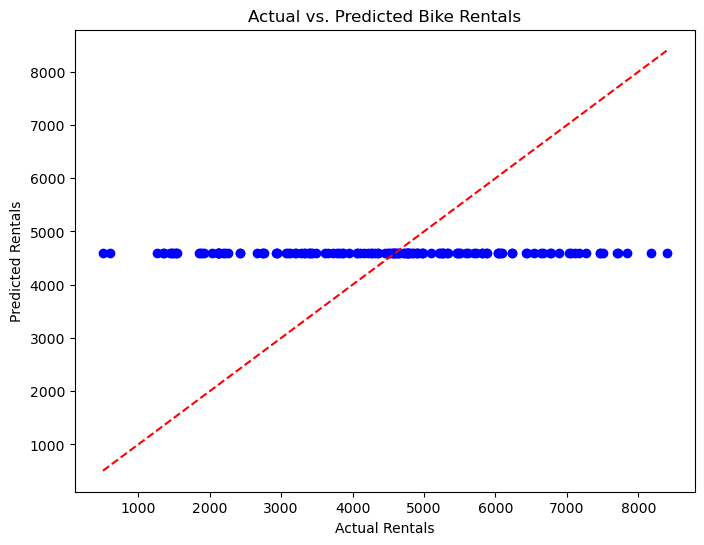

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'rentals' is the target variable and 'feature1', 'feature2', etc. are your predictor variables
selected_features = selected_features  # Replace with your predictor variables

X = df[selected_features]  # Features
y = df['rentals']  # Target variable

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factors (VIF):")
print(vif_data)

# Identify features with high VIF (typically VIF > 5 indicates multicollinearity)
high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
print("\nFeatures with high VIF (> 5):")
print(high_vif_features)

# Remove highly correlated features and refit the model
X_new = X.drop(columns=high_vif_features)

# Split the dataset into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Make predictions on the testing set
y_pred = model.predict(sm.add_constant(X_test))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("\nModel Performance after removing multicollinearity:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r_squared)

# Print the model summary
print("\nFinal Model Summary:")
print(model.summary())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Bike Rentals')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.show()